# TD 4 - La régression linéaire - algo. de descente du gradient

## Packages utiles

In [59]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

## Les données

In [60]:
#66 Import des données
boston = datasets.load_boston()
print(boston.DESCR)
#0- CRIM     per capita crime rate by town
#1- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#2- INDUS    proportion of non-retail business acres per town
#3- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#4- NOX      nitric oxides concentration (parts per 10 million)
#5- RM       average number of rooms per dwelling
#6- AGE      proportion of owner-occupied units built prior to 1940
#7- DIS      weighted distances to five Boston employment centres
#8- RAD      index of accessibility to radial highways
#9- TAX      full-value property-tax rate per $10,000
#10- PTRATIO  pupil-teacher ratio by town
#11- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#12- LSTAT    % lower status of the population
#13- MEDV     Median value of owner-occupied homes in $1000's


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
#-- Récupérer les variables explicatives (X) et leur nom, la variable à expliquer (Y)
X = boston.data
names = boston.feature_names
Y = boston.target

### Analyser et sélectionner les données étudiées

In [62]:
#-- Afficher les statistiques descriptives
print(stats.describe(X))
print(names)
print(stats.describe(Y))

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

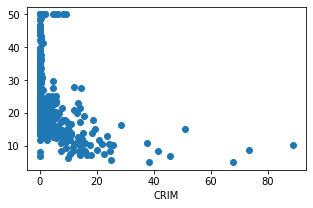

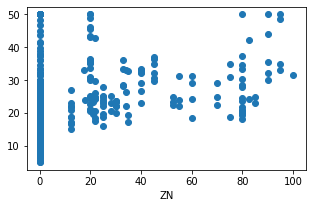

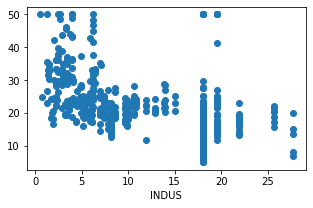

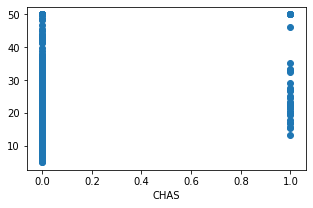

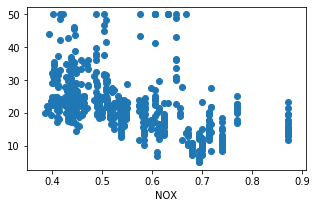

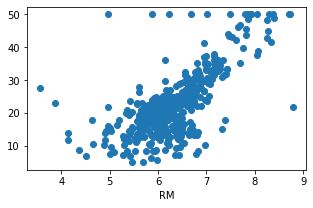

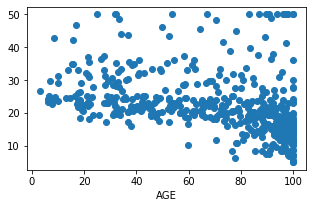

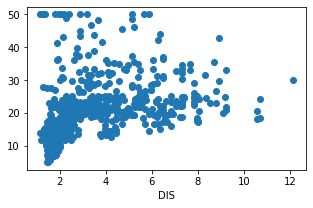

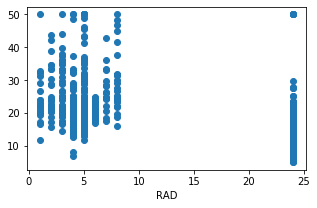

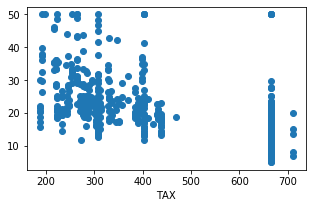

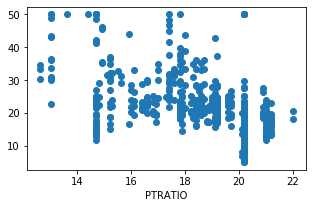

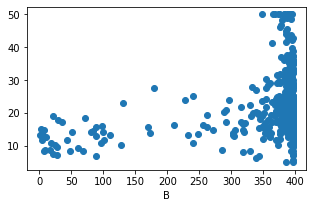

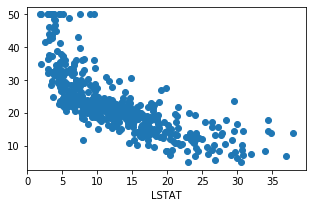

In [63]:
#-- Sélectionner les variables pour la régression simple puis multiple et afficher les (scatterplot)

for i in range(X.shape[1]):
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,i],Y)
    plt.xlabel(names[i])
    plt.show()



In [64]:
#-- Préparer les données étudiées
m,d = X.shape
k = 5
xx = np.hstack((np.ones((m,1)),X))
x1 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,k],(m,1))))
x2 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,2],(m,1)), np.reshape(xx[:,5],(m,1))))
print(x2)


[[ 1.    18.     0.538]
 [ 1.     0.     0.469]
 [ 1.     0.     0.469]
 ...
 [ 1.     0.     0.573]
 [ 1.     0.     0.573]
 [ 1.     0.     0.573]]


## Algorithme de descente du gradient

Code des fonctions et tests de ces fonctions dans le cas de la régression simple et multiple

ATTENTION : les paramètres des fonctions sont à compléter


In [65]:
#-- Modèle

def f(x,B):
    return np.dot(x,B)

B1 = [2,3]
B2 = [2,3,1]

#-- Test 1 - reg simple
print(f(x1,B1))

#-- Test 2 - reg multiple

print(f(x2,B2))


[3.614  3.407  3.407  3.374  3.374  3.374  3.572  3.572  3.572  3.572
 3.572  3.572  3.572  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.497  3.497  3.497  3.497  3.284
 3.284  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344
 3.317  3.317  3.317  3.317  3.23   3.209  3.23   3.233  3.359  3.359
 3.359  3.359  3.359  3.359  3.2483 3.194  3.194  3.227  3.227  3.227
 3.239  3.239  3.239  3.239  3.311  3.311  3.311  3.311  3.311  3.311
 3.278  3.278  3.278  3.278  3.347  3.347  3.347  3.347  3.467  3.467
 3.467  3.467  3.392  3.392  3.392  3.335  3.335  3.335  3.335  3.335
 3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56
 3.56   3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641
 3.743  3.743  3.743  3.743  3.743  3.743  3.743  3.872  3.872  3.872
 3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872
 3.872  3.872  4.613 

In [66]:
#%% Fonction-cout
def cout(x,y,B):
    return (np.sum((f(x,B)-y)**2))/(2*x.shape[0])
#%% Test 1 - reg simple
print(cout(x1,Y,B1))
#%% Test 2 - reg multiple
print(cout(x2,Y,B2))

221.64793909170947
2349.4674978854646


In [85]:
#%% Gradient
def grad(x,y,B,pas):
    b = B.copy()
    b[0] = b[0] - (pas * np.sum(f(x,B)-y) / x.shape[0])
    b[1:] = b[1:] - (pas * np.sum(np.dot(f(x,B)-y,x)) / x.shape[0])
    return b
    #return B - (pas * np.sum(np.dot(f(x,B)-y,x)) / x.shape[0])
#%% Test 1 - reg simple
print(B1)
print(grad(x1,Y,B1,0.5))
print(B1)

#%% Test 2 - reg multiple
print(grad(x2,Y,B2,0.5))

[2, 3]
[11.434360573122529, 17.42019591870553]
[2, 3]
[-5.056398913043478, -861.3156487846737, -863.3156487846737]


In [68]:

#--- standardisation des X (données centrées-réduites)
# attention : ne pas standardiser X^0...
def standardisation(X):
    x = X[:,1:]
    return np.hstack((X[:,:1],(x - x.mean()) / x.std(ddof=0)))
#-- Test 1 - reg simple
print(standardisation(x1))

#-- Test 2 - reg multiple
print(standardisation(x2))

[[ 1.         -0.14421743]
 [ 1.         -0.74026221]
 [ 1.         -0.74026221]
 ...
 [ 1.          0.15812412]
 [ 1.          0.15812412]
 [ 1.          0.15812412]]
[[ 1.          0.69443071 -0.31265474]
 [ 1.         -0.3436828  -0.31663418]
 [ 1.         -0.3436828  -0.31663418]
 ...
 [ 1.         -0.3436828  -0.31063619]
 [ 1.         -0.3436828  -0.31063619]
 [ 1.         -0.3436828  -0.31063619]]


In [69]:
#%% Algo de descente du gradient
def grad_descent(init,x,y,pas,converge,ITE_MAX):
    cout_arr = []
    B = np.asarray(init).astype(float)
    b_arr = [B]
    nbIt = 0
    x_normalize = standardisation(x) #On suppose que le bias est déjà présent
    old_cout = cout(x_normalize,y,B)
    new_cout = old_cout-0.01
    while(new_cout > converge and new_cout < old_cout and nbIt < ITE_MAX):
        B = grad(x_normalize,y,B,pas)
        old_cout = new_cout
        new_cout = cout(x_normalize,y,B)
        b_arr.append(B.tolist())
        cout_arr.append(new_cout)
        nbIt += 1
    return b_arr,cout_arr
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.1,10,500)
print(b)
print(c)
#-- Test 2 - reg multiple
b, c =grad_descent((0,0,0),x2,Y,0.05,10,500)

[array([0., 0.]), [2.2532806324110677, 1.8606578134007743], [4.281233201581028, 3.3099217822203646], [6.1063905138339925, 4.411464097241], [7.7490320948616604, 5.220336449534275], [9.227409517786562, 5.784057408495457], [10.557949198418973, 6.14356852926803], [11.755434910988143, 6.334074569900105], [12.833172052300396, 6.385781435212055], [13.803135479481424, 6.3245438998615855], [14.67610256394435, 6.1724337753280585], [15.461772939960982, 5.948237954801593], [16.16887627837595, 5.66789467872611], [16.805269282949425, 5.344875396416679], [17.37802298706555, 4.990518741880844], [17.89350132077006, 4.6143223823869794], [18.35743182110412, 4.224197825472051], [18.77496927140478, 3.8266926742152085], [19.150752976675367, 3.427184293053985], [19.488958311418898, 3.030048379481825], [19.793343112688074, 2.6388055237925276], [20.067289433830332, 2.2562484735452424], [20.313841122858367, 1.8845524962084599], [20.535737642983598, 1.525370947702552], [20.735444511096304, 1.1799179020347124], [

## Test avec plusieurs initialisations : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

36.76243272574837
[22.532806119448864, 2.4626500840123966, 2.4626500840123966]


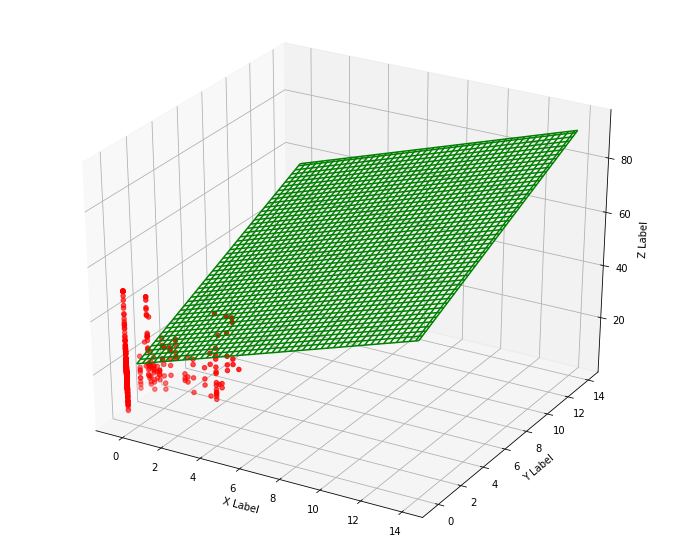

36.76243272574834
[22.532806155918433, 2.462650038220904, 2.462650038220904]


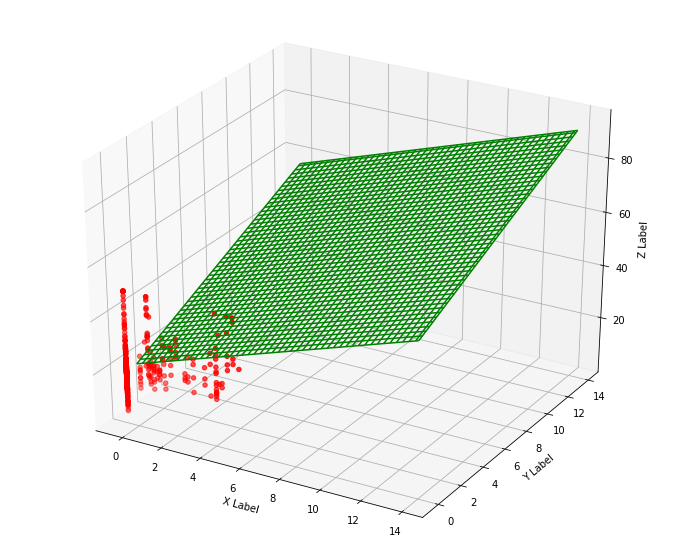

In [79]:
# -- Test 1  - reg simple
def display(fig_number,data_X,data_Y,data_b,data_c):
    plt.figure(fig_number,figsize=(10,6))
    x = np.linspace(-2,3,100)
    for i in range(0,len(data_b)-1,10): 
        y = data_b[i][0] + (x*data_b[i][1])
        plt.plot(x,y,color='gray')
        print(data_c[i])
    y = data_b[-1][0] + (x*data_b[-1][1])
    print(data_c[-1])
    print(data_b[-1])
    plt.plot(x,y,color='red')
    plt.scatter(standardisation(data_X)[:,1],data_Y)
    plt.xlabel(names[k])
    plt.show()
#b, c = grad_descent((0,0),x1,Y,0.05,10,500)
#display(1,x1,Y,b,c)
#b, c = grad_descent((5,-1),x1,Y,0.05,10,500)
#display(2,x1,Y,b,c)
#-- Test 2 - reg multiple
from mpl_toolkits.mplot3d import Axes3D
def display3D(fig_number,data_X,data_Y,data_b,data_c):
    fig = plt.figure(fig_number,figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0, 14, 0.05)
    x, y = np.meshgrid(x, y)
   # z = data_b[0][0] + (x*data_b[0][1]) + (y*data_b[0][2])
   # z = z.reshape(x.shape)
  #  ax.plot_surface(x,y,z,color='green')
    #for i in range(1,len(data_b)-1,10): 
        #z = data_b[i][0] + (x*data_b[i][1]) + (y*data_b[i][2])
       # z = z.reshape(x.shape)
        #print(data_c[i])
        #ax.plot_surface(x,y,z,color='gray')
    print(data_c[-1])
    print(data_b[-1])
    z = data_b[-1][0] + (x*data_b[-1][1]) + (y*data_b[-1][2])
    z = z.reshape(x.shape)
    ax.plot_wireframe(x,y,z,color='green')
    xx = standardisation(data_X)
    ax.scatter(xx[:,1],xx[:,2],data_Y,c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
b, c = grad_descent((0,0,0),x2,Y,0.05,10,500)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,0.05,10,500)
display3D(1,x2,Y,b,c)

**Commentaires:**


## Test avec plusieurs pas de descente : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

291.76941821107073
254.57805138111172
225.79737869906788
202.9790403857188
184.40007700310443
168.85942336799107
155.528198142066
143.84026529647983
133.41280890103394
123.98916465474656
115.39806406981721
107.5249053205027
100.29177328906066
93.64377149343136
87.53986318285634
81.9468964421228
76.83584603404937
72.17957168436752
67.95159063850362
64.12550849007592
60.674859398158446
57.573184700330366
54.79423505159603
52.312221220945474
50.102066814060656
48.139635658483286
46.4019197752789
44.86718254516091
43.51505717029049
42.32660379970714
41.28433042899213
40.37218341033638
39.57551347960117
38.881022877089826
38.27669858501566
37.75173604649927
37.296457046809344
36.902224776800196
36.561358490036376
36.267049623862384
36.01328078624238
35.7947486140675
35.60679118061437
35.44532036366757
35.30675937426532
35.18798548163915
35.08627784549009
34.99927027559047
34.924908674808165
34.86141287972914
34.80724258854634
34.761067054916616
34.72173822583063
34.68826700852419
34.6598023

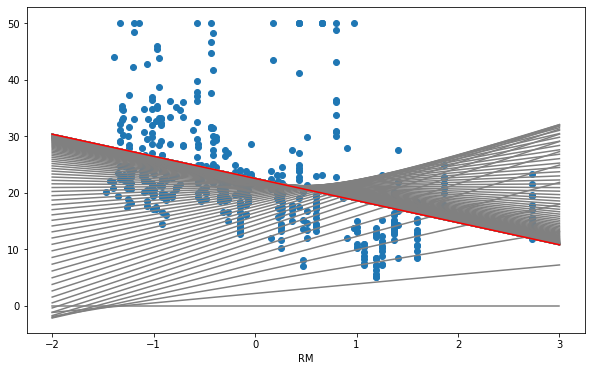

256.87575012662893
108.25444156101578
56.65303979410921
39.71047497085143
35.55208273177738
34.69394243274693
34.5349011158071
34.50747352227864
34.50298008339414
34.50227160485586
34.50216316481866
34.502146954546895
34.50214457755031
34.50214423452696
34.502144185688365
34.50214417881454
34.50214417785667
34.50214417772435
34.5021441777062
34.50214417770374
34.50214417770339
34.50214417770337
[22.532806314723608, -3.9262279746508453]


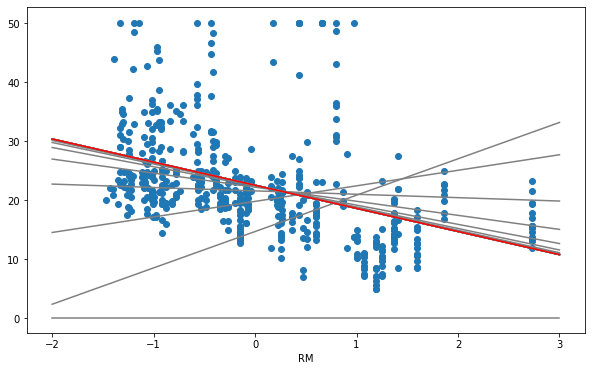

288.3658245976442
34.50214417770335
[22.53280632411067, -3.9262281901029246]


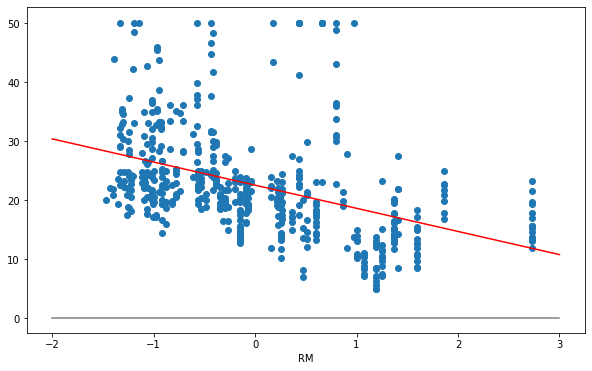

36.803253937510654
[22.384754902260088, 2.644983442843694, 2.644983442843694]


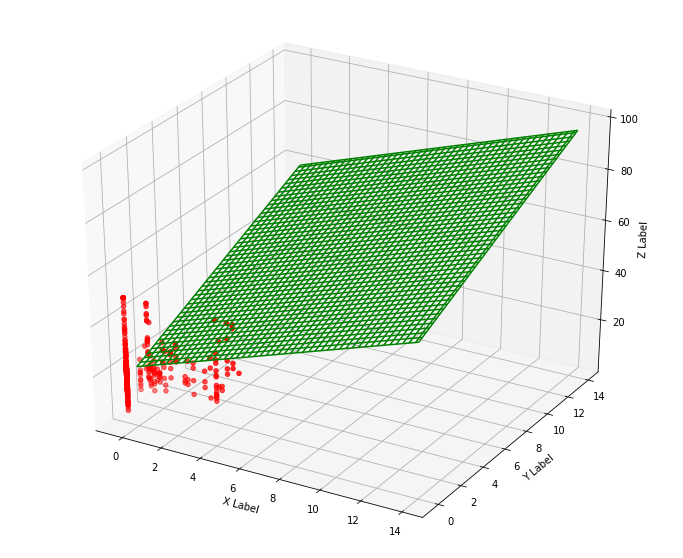

36.762432725748326
[22.532806182121337, 2.4626500053203833, 2.4626500053203833]


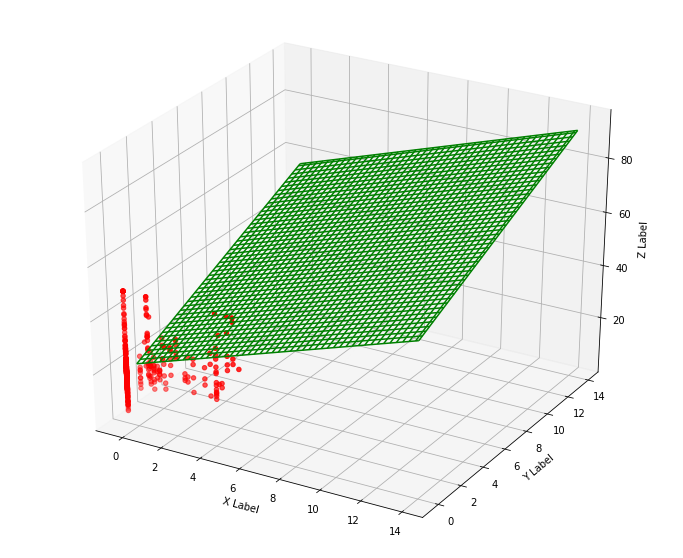

159.67054733873883
[22.532806324110673, 14.16035000623474, 14.16035000623474]


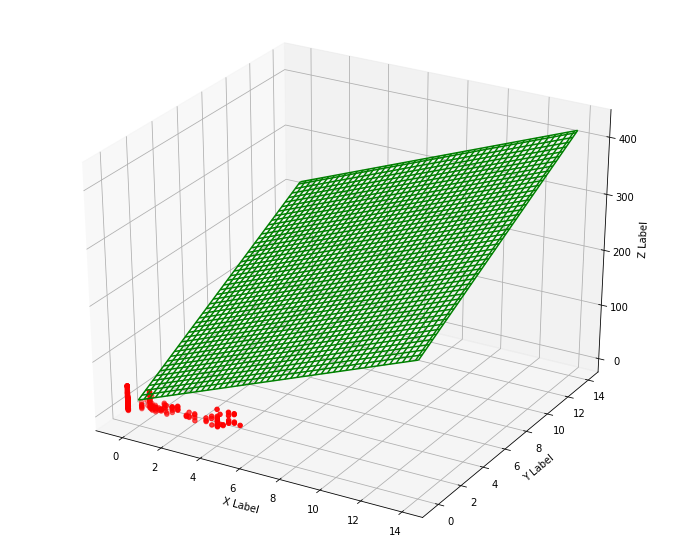

In [80]:
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.01,10,1000)
display(3,x1,Y,b,c)
b, c = grad_descent((0,0),x1,Y,0.1,10,500)
display(4,x1,Y,b,c)
b, c = grad_descent((0,0),x1,Y,1,10,500)
display(5,x1,Y,b,c)


#-- Test 2 - reg multiple
b, c = grad_descent((0,0,0),x2,Y,0.01,10,500)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,0.1,10,500)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,1,10,500)
display3D(1,x2,Y,b,c)

**Commentaires:**

## Commentaires
**pour le choix du critère d'arrêt:**





**pour la standardisation des données:**





## Comparaison avec les résultats du maximum de vraisemblance

[22.53280632 -3.92622819]


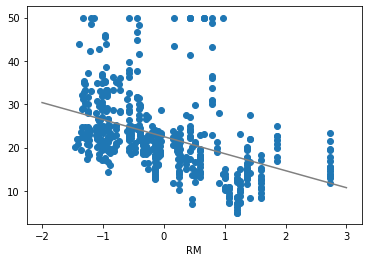

[-118.94837802    1.30284859 -452.61073931]


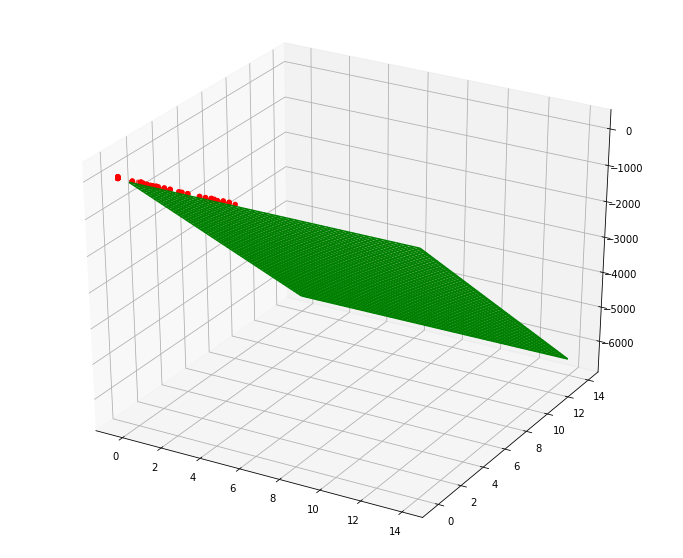

In [82]:
#-- Pour comparer avec le maximum de vraisemblance
#(X^T X)^-1 X^T Y
def coef_ml(x,y):
    x_standard = standardisation(x)
    trans = np.transpose(x_standard)
    return np.dot(np.dot(np.linalg.inv(np.dot(trans,x_standard)),trans),y)
    
#-- Test 1  - reg simple
maxi1 = coef_ml(x1,Y)
print(maxi1)
x = np.linspace(-2,3,100)
y = maxi1[0] + (x*maxi1[1])
plt.figure(6)
plt.plot(x,y,color='gray')
plt.scatter(standardisation(x1)[:,1],Y)
plt.xlabel(names[k])
plt.show()
#-- Test 2 - reg multiple
maxi2 = coef_ml(x2,Y)
print(maxi2)
fig = plt.figure(1,figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 14, 0.05)
x, y = np.meshgrid(x, y)
z = maxi2[0] + (x*maxi2[1]) + (y*maxi2[2])
z = z.reshape(x.shape)
ax.plot_wireframe(x,y,z,color='green')
xx = standardisation(x2)
ax.scatter(xx[:,1],xx[:,2],Y,c='r', marker='o')
plt.show()
#-- (ou bien utiliser la fonction native de sklearn)

**Commentaires:**